# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load numpy
import numpy as np

# Set random seed
np.random.seed(0)

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [178]:
df.iloc[1]

num_passengers                     1
sales_channel               Internet
trip_type                  RoundTrip
purchase_lead                    112
length_of_stay                    20
flight_hour                        3
flight_day                       Sat
route                         AKLDEL
booking_origin           New Zealand
wants_extra_baggage                0
wants_preferred_seat               0
wants_in_flight_meals              0
flight_duration                 5.52
booking_complete                   0
Name: 1, dtype: object

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["route"].unique()

In [7]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [11]:
df["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [ ]:
df.describe()

In [7]:
na=pd.concat([df.isnull().sum()], axis=1, keys=['Train'])
na[na.sum(axis=1) > 0]

,Train


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
#feature_importances_ attribute

In [3]:

from sklearn.preprocessing import OneHotEncoder

In [4]:
# Apply onehot encoder on sales_channel, trip_type
encoder=OneHotEncoder()
encoder.fit_transform(df[['sales_channel','trip_type']]).toarray()


array([[1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.]])

In [5]:
feature_array=encoder.fit_transform(df[['sales_channel','trip_type']]).toarray()

In [25]:
encoder.categories_

[array(['Internet', 'Mobile'], dtype=object),
 array(['CircleTrip', 'OneWay', 'RoundTrip'], dtype=object)]

In [7]:
feature_labels=encoder.categories_

In [8]:
np.hstack(feature_labels)

array(['Internet', 'Mobile', 'CircleTrip', 'OneWay', 'RoundTrip'],
      dtype=object)

In [9]:
feature_labels=np.hstack(feature_labels)
print(feature_labels)

['Internet' 'Mobile' 'CircleTrip' 'OneWay' 'RoundTrip']


In [10]:
pd.DataFrame(feature_array, columns=feature_labels)

,Internet,Mobile,CircleTrip,OneWay,RoundTrip
0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
49995,1.0,0.0,0.0,0.0,1.0
49996,1.0,0.0,0.0,0.0,1.0
49997,1.0,0.0,0.0,0.0,1.0
49998,1.0,0.0,0.0,0.0,1.0


In [11]:
features_encoded=pd.DataFrame(feature_array, columns=feature_labels)

In [12]:
features_encoded.head()

,Internet,Mobile,CircleTrip,OneWay,RoundTrip
0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0


In [13]:
pd.concat([df,features_encoded],axis=1)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Internet,Mobile,CircleTrip,OneWay,RoundTrip
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,1.0,0.0,0.0,0.0,1.0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,1.0,0.0,0.0,0.0,1.0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0


In [14]:
df_encoded_1=pd.concat([df,features_encoded],axis=1)

In [118]:
df_encoded_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   purchase_lead          50000 non-null  int64  
 2   length_of_stay         50000 non-null  int64  
 3   flight_hour            50000 non-null  int64  
 4   flight_day             0 non-null      float64
 5   wants_extra_baggage    50000 non-null  int64  
 6   wants_preferred_seat   50000 non-null  int64  
 7   wants_in_flight_meals  50000 non-null  int64  
 8   flight_duration        50000 non-null  float64
 9   booking_complete       50000 non-null  int64  
 10  Internet               50000 non-null  float64
 11  Mobile                 50000 non-null  float64
 12  CircleTrip             50000 non-null  float64
 13  OneWay                 50000 non-null  float64
 14  RoundTrip              50000 non-null  float64
 15  ro

In [15]:
df_encoded_1=df_encoded_1.drop(['sales_channel','trip_type'],axis='columns')
df_encoded_1

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Internet,Mobile,CircleTrip,OneWay,RoundTrip
0,2,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0
49996,1,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,1.0,0.0,0.0,0.0,1.0
49997,1,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0
49998,1,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0


In [117]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df_encoded_1["flight_day"] = df_encoded_1["flight_day"].map(mapping)
df_encoded_1

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,route_7,route_8,route_9,booking_origin_0,booking_origin_1,booking_origin_2,booking_origin_3,booking_origin_4,booking_origin_5,booking_origin_6
0,2,262,19,7,NaN,1,0,0,5.52,0,...,0,0,1,0,0,0,0,0,0,1
1,1,112,20,3,NaN,0,0,0,5.52,0,...,0,0,1,0,0,0,0,0,0,1
2,2,243,22,17,NaN,1,1,0,5.52,0,...,0,0,1,0,0,0,0,0,1,0
3,1,96,31,4,NaN,0,0,1,5.52,0,...,0,0,1,0,0,0,0,0,0,1
4,2,68,22,15,NaN,1,0,1,5.52,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,NaN,1,0,1,5.62,0,...,1,1,1,0,1,0,0,1,0,1
49996,1,111,6,4,NaN,0,0,0,5.62,0,...,1,1,1,0,1,0,0,1,0,1
49997,1,24,6,22,NaN,0,0,1,5.62,0,...,1,1,1,0,1,0,0,1,0,1
49998,1,15,6,11,NaN,1,0,1,5.62,0,...,1,1,1,0,1,0,0,1,0,1


In [17]:
#Binary encoding
import category_encoders as ce

In [18]:
from category_encoders import BinaryEncoder

In [19]:
b_encoder=BinaryEncoder()
be_encoded =b_encoder.fit_transform(df_encoded_1['route'])

In [20]:
be_encoded2 =b_encoder.fit_transform(df_encoded_1['booking_origin'])

In [21]:

df_encoded_1=pd.concat([df_encoded_1,be_encoded],axis=1)
df_encoded_1

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,route_0,route_1,route_2,route_3,route_4,route_5,route_6,route_7,route_8,route_9
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,Australia,1,0,1,...,1,0,0,1,1,1,1,1,1,1
49996,1,111,6,4,7,PERPNH,Australia,0,0,0,...,1,0,0,1,1,1,1,1,1,1
49997,1,24,6,22,6,PERPNH,Australia,0,0,1,...,1,0,0,1,1,1,1,1,1,1
49998,1,15,6,11,1,PERPNH,Australia,1,0,1,...,1,0,0,1,1,1,1,1,1,1


In [22]:
df_encoded_1=pd.concat([df_encoded_1,be_encoded2],axis=1)
df_encoded_1=df_encoded_1.drop(['route','booking_origin'],axis='columns')
df_encoded_1

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,route_7,route_8,route_9,booking_origin_0,booking_origin_1,booking_origin_2,booking_origin_3,booking_origin_4,booking_origin_5,booking_origin_6
0,2,262,19,7,6,1,0,0,5.52,0,...,0,0,1,0,0,0,0,0,0,1
1,1,112,20,3,6,0,0,0,5.52,0,...,0,0,1,0,0,0,0,0,0,1
2,2,243,22,17,3,1,1,0,5.52,0,...,0,0,1,0,0,0,0,0,1,0
3,1,96,31,4,6,0,0,1,5.52,0,...,0,0,1,0,0,0,0,0,0,1
4,2,68,22,15,3,1,0,1,5.52,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0,...,1,1,1,0,1,0,0,1,0,1
49996,1,111,6,4,7,0,0,0,5.62,0,...,1,1,1,0,1,0,0,1,0,1
49997,1,24,6,22,6,0,0,1,5.62,0,...,1,1,1,0,1,0,0,1,0,1
49998,1,15,6,11,1,1,0,1,5.62,0,...,1,1,1,0,1,0,0,1,0,1


In [67]:
df_encoded_1

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,route_7,route_8,route_9,booking_origin_0,booking_origin_1,booking_origin_2,booking_origin_3,booking_origin_4,booking_origin_5,booking_origin_6
0,2,262,19,7,6,1,0,0,5.52,0,...,0,0,1,0,0,0,0,0,0,1
1,1,112,20,3,6,0,0,0,5.52,0,...,0,0,1,0,0,0,0,0,0,1
2,2,243,22,17,3,1,1,0,5.52,0,...,0,0,1,0,0,0,0,0,1,0
3,1,96,31,4,6,0,0,1,5.52,0,...,0,0,1,0,0,0,0,0,0,1
4,2,68,22,15,3,1,0,1,5.52,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0,...,1,1,1,0,1,0,0,1,0,1
49996,1,111,6,4,7,0,0,0,5.62,0,...,1,1,1,0,1,0,0,1,0,1
49997,1,24,6,22,6,0,0,1,5.62,0,...,1,1,1,0,1,0,0,1,0,1
49998,1,15,6,11,1,1,0,1,5.62,0,...,1,1,1,0,1,0,0,1,0,1


In [23]:
df_encoded_1=df_encoded_1.drop(['route_0'],axis='columns')
df_encoded_1

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,route_7,route_8,route_9,booking_origin_0,booking_origin_1,booking_origin_2,booking_origin_3,booking_origin_4,booking_origin_5,booking_origin_6
0,2,262,19,7,6,1,0,0,5.52,0,...,0,0,1,0,0,0,0,0,0,1
1,1,112,20,3,6,0,0,0,5.52,0,...,0,0,1,0,0,0,0,0,0,1
2,2,243,22,17,3,1,1,0,5.52,0,...,0,0,1,0,0,0,0,0,1,0
3,1,96,31,4,6,0,0,1,5.52,0,...,0,0,1,0,0,0,0,0,0,1
4,2,68,22,15,3,1,0,1,5.52,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0,...,1,1,1,0,1,0,0,1,0,1
49996,1,111,6,4,7,0,0,0,5.62,0,...,1,1,1,0,1,0,0,1,0,1
49997,1,24,6,22,6,0,0,1,5.62,0,...,1,1,1,0,1,0,0,1,0,1
49998,1,15,6,11,1,1,0,1,5.62,0,...,1,1,1,0,1,0,0,1,0,1


In [24]:
# Actual training

df_1011=df_encoded_1.drop('OneWay',axis='columns')
df_1011=df_1011.drop('Internet',axis='columns')
df_1011

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,route_7,route_8,route_9,booking_origin_0,booking_origin_1,booking_origin_2,booking_origin_3,booking_origin_4,booking_origin_5,booking_origin_6
0,2,262,19,7,6,1,0,0,5.52,0,...,0,0,1,0,0,0,0,0,0,1
1,1,112,20,3,6,0,0,0,5.52,0,...,0,0,1,0,0,0,0,0,0,1
2,2,243,22,17,3,1,1,0,5.52,0,...,0,0,1,0,0,0,0,0,1,0
3,1,96,31,4,6,0,0,1,5.52,0,...,0,0,1,0,0,0,0,0,0,1
4,2,68,22,15,3,1,0,1,5.52,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0,...,1,1,1,0,1,0,0,1,0,1
49996,1,111,6,4,7,0,0,0,5.62,0,...,1,1,1,0,1,0,0,1,0,1
49997,1,24,6,22,6,0,0,1,5.62,0,...,1,1,1,0,1,0,0,1,0,1
49998,1,15,6,11,1,1,0,1,5.62,0,...,1,1,1,0,1,0,0,1,0,1


In [25]:
X=df_1011.drop('booking_complete',axis='columns')
X

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Mobile,...,route_7,route_8,route_9,booking_origin_0,booking_origin_1,booking_origin_2,booking_origin_3,booking_origin_4,booking_origin_5,booking_origin_6
0,2,262,19,7,6,1,0,0,5.52,0.0,...,0,0,1,0,0,0,0,0,0,1
1,1,112,20,3,6,0,0,0,5.52,0.0,...,0,0,1,0,0,0,0,0,0,1
2,2,243,22,17,3,1,1,0,5.52,0.0,...,0,0,1,0,0,0,0,0,1,0
3,1,96,31,4,6,0,0,1,5.52,0.0,...,0,0,1,0,0,0,0,0,0,1
4,2,68,22,15,3,1,0,1,5.52,0.0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0.0,...,1,1,1,0,1,0,0,1,0,1
49996,1,111,6,4,7,0,0,0,5.62,0.0,...,1,1,1,0,1,0,0,1,0,1
49997,1,24,6,22,6,0,0,1,5.62,0.0,...,1,1,1,0,1,0,0,1,0,1
49998,1,15,6,11,1,1,0,1,5.62,0.0,...,1,1,1,0,1,0,0,1,0,1


In [26]:
y=df_1011.booking_complete
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_Train, x_test , y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [101]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=100,max_features=0.2,max_samples= 0.5, n_estimators= 100,n_jobs=-1)
#n_estimators=125, random_state=42, verbose=1,n_jobs=2,max_depth=64)
#Best from gridsearch
#max_depth': 64, 'max_features': 0.2, 'max_samples': 0.5, 'n_estimators': 100
model.fit(X_Train, y_train)

RandomForestClassifier(max_depth=100, max_features=0.2, max_samples=0.5,
                       n_jobs=-1)

In [102]:
y_pred=model.predict(x_test)

In [139]:
from sklearn.metrics import accuracy_score
print("Accuracy of the model: "+ str(accuracy_score(y_test, y_pred)*100) + " %")

Accuracy of the model: 85.544 %


In [89]:
model.score(x_test,y_test)

0.85376

In [90]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.15 degrees.
Accuracy: -inf %.


In [92]:
from sklearn.metrics import roc_curve,auc
fp_rate, tp_rate, thres =roc_curve(y_test,y_pred)
roc_auc =auc(fp_rate,tp_rate)
roc_auc

0.5372564109221375

In [94]:
feature_list= list(X.columns)
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:28} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: purchase_lead                Importance: 0.18
Variable: flight_hour                  Importance: 0.14
Variable: length_of_stay               Importance: 0.13
Variable: flight_day                   Importance: 0.09
Variable: flight_duration              Importance: 0.06
Variable: num_passengers               Importance: 0.05
Variable: wants_in_flight_meals        Importance: 0.03
Variable: booking_origin_1             Importance: 0.03
Variable: booking_origin_5             Importance: 0.03
Variable: wants_extra_baggage          Importance: 0.02
Variable: wants_preferred_seat         Importance: 0.02
Variable: route_1                      Importance: 0.02
Variable: route_2                      Importance: 0.02
Variable: route_3                      Importance: 0.02
Variable: route_4                      Importance: 0.02
Variable: route_5                      Importance: 0.02
Variable: route_6                      Importance: 0.02
Variable: route_7                      Importanc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [135]:
route_total=0
for i in range(11,21):
    route_total += feature_importances[i][1]
print("Route feature total contribution: ", str(100 * round(route_total,2)) + "%")

#for i in range(21,28):
    #print(feature_importances[i])



booking_origin_total=0
for i in range(22,25):
    booking_origin_total += feature_importances[i][1]
booking_origin_total = booking_origin_total + feature_importances[8][1]+ feature_importances[7][1]+ feature_importances[20][1]
print("Booking origin feature total contribution: ",str(100 * round(booking_origin_total,2)) + "%")

Route feature total contribution:  20.0%
Booking origin feature total contribution:  11.0%


Text(0.5, 1.0, 'Variable Importances')

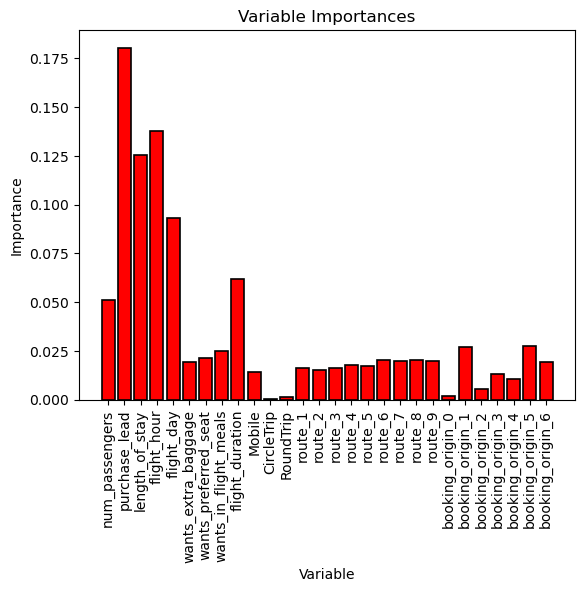

In [95]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable'); plt.title('Variable Importances')

In [96]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,80]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [97]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)


{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, 80], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [98]:
model2= RandomForestClassifier()

In [99]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = model2, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [100]:
rf_random.fit(X_Train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
print(rf_random.best_params_)
print(rf_random.best_score_)

{'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_samples': 0.75, 'max_features': 0.6, 'max_depth': 8, 'bootstrap': True}
0.8504533333333335


In [ ]:
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,64]

# Number of samples
max_samples = [0.5,0.75,1.0]

In [ ]:
param_grid_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid_search)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, 64], 'max_samples': [0.5, 0.75, 1.0]}


In [ ]:
model_grid= RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_grid_search = GridSearchCV(estimator = model_grid, 
                       param_grid = param_grid_search, 
                       cv = 5, 
                       verbose=2,
                       n_jobs=-1)


In [ ]:
rf_grid_search.fit(X_Train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, 64],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [ ]:
print(rf_grid_search.best_params_)
print(rf_grid_search.best_score_)

{'max_depth': 64, 'max_features': 0.2, 'max_samples': 0.5, 'n_estimators': 100}
0.85104


In [140]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     10648
           1       0.57      0.10      0.17      1852

    accuracy                           0.86     12500
   macro avg       0.72      0.54      0.54     12500
weighted avg       0.82      0.86      0.81     12500



In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(confusion_matrix(cm,[1,0]))

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.